# Introdução Machine Learning - Data ICMC-USP

## Tarefa Aula 02 - Introdução a EDA

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Fonte dos dados utilizados: https://www.kaggle.com/avikasliwal/used-cars-price-prediction

O objetivo dessa prática é demonstrar o uso de ferramentas do Python para EDA.

Aproveite o material!

In [ ]:
#importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo e Limpando os Dados

  Leia o dataset fornecido no formato Dataframe do Pandas. Os dados fornecem características de carros usados vendidos na Índia.

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Leia os dados de data.csv com pd.read_csv e guarde      #
# na variável df                                             #
##############################################################

df = pd.read_csv('/content/data.csv')

##############################################################

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
## A função sample pode ser uma alternativa ao head. 
## Ela pega uma amostra aleatória dos dados 
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1095,1095,Hyundai EON D Lite Plus,Hyderabad,2013,17729,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,3.65
252,252,Volkswagen Polo GT 1.5 TDI,Jaipur,2014,60000,Diesel,Manual,Second,19.91 kmpl,1498 CC,103.6 bhp,5.0,NaN,3.70
1949,1949,Tata Sumo EX,Bangalore,2014,66000,Diesel,Manual,First,15.3 kmpl,2956 CC,83.8 bhp,7.0,NaN,4.45
995,995,Mercedes-Benz A Class A180 Sport,Pune,2015,11000,Petrol,Automatic,First,15.5 kmpl,1595 CC,120.7 bhp,5.0,NaN,16.00
1582,1582,Skoda Yeti Elegance,Chennai,2011,79000,Diesel,Manual,First,17.67 kmpl,1968 CC,138.08 bhp,5.0,NaN,7.50


In [ ]:
#podemos usar o dtypes para saber o tipo de variável que é armazenado em cada coluna
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Observe as colunas e classifique cada coluna no tipo numérico ou categórico.

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - A coluna 'Unnamed: 0' é apenas um índice. Vamos         #
#    remove-la com o comando drop do pandas                  #
#                                                            #
#                                                            #
# OBS: Queremos dropar no sentido das colunas, usar axis=1   #
##############################################################
#seu código aqui

df = df.drop('Unnamed: 0', axis=1)

##############################################################

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Os datasets dificilmente estão 100% limpos, com todos os seus valores preenchidos. Por isso é sempre importante checar quais colunas possuem valores nulos.

In [ ]:
# O isnull() gera uma cópia do df com false onde nos valores
# não nulos e true onde tinham valores nulos, na pratica é uma tabela que diz onde tem valores nulos
null_table = df.isnull()
print(null_table)

       Name  Location   Year  Kilometers_Driven  ...  Power  Seats  New_Price  Price
0     False     False  False              False  ...  False  False       True  False
1     False     False  False              False  ...  False  False       True  False
2     False     False  False              False  ...  False  False      False  False
3     False     False  False              False  ...  False  False       True  False
4     False     False  False              False  ...  False  False       True  False
...     ...       ...    ...                ...  ...    ...    ...        ...    ...
6014  False     False  False              False  ...  False  False      False  False
6015  False     False  False              False  ...  False  False       True  False
6016  False     False  False              False  ...  False  False       True  False
6017  False     False  False              False  ...  False  False       True  False
6018  False     False  False              False  ...  False  Fals

In [ ]:
#agora usamos o sum() para facilitar a vizualização vamos obter a quantidade de nulos por coluna
print(null_table.sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [ ]:
#podemos fazer em apenas uma linha
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

 A coluna New_Price tem muitos valores nulos. Vamos checar o tamanho do dataset. 

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Encontre a razão entre o númrto de nulos na coluna      #
#    New_Price e o número de instâncias do dataset           #
#                                                            #
##############################################################


ratio = df.isnull().sum()['New_Price']/df.shape[0] 

##############################################################

print(ratio)

0.8631001827546104


Quantos nulos são o suficiente para a exclusão de uma coluna? Essa resposta não é exata, e depende muito do contexto e do significado da feature. Nesse caso, como encontramos um ratio muito alto, vamos dropar a coluna New_Price, mas essa é sempre umas das questões que você deve pensar ao se trabalhar com um dataset.

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Drope a coluna New_Price                                #
#                                                            #
##############################################################

df = df.drop('New_Price',axis = 1)


##############################################################
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Quanto aos outros valores nulos, vamos apenas ignorá-los por hora por serem poucos valores e não serem o foco da prática. 

## Estatística Descritiva

In [ ]:
# Exemplo função loc

#Selecionado o nome e o Preço dos 10 primeiros carros no dataset
#A primeira parte do loc é referente às linhas e a
#segunda parte é referente às colunas
df.loc[:10,['Name','Price']]

,Name,Price
0,Maruti Wagon R LXI CNG,1.75
1,Hyundai Creta 1.6 CRDi SX Option,12.50
2,Honda Jazz V,4.50
3,Maruti Ertiga VDI,6.00
4,Audi A4 New 2.0 TDI Multitronic,17.74
5,Hyundai EON LPG Era Plus Option,2.35
6,Nissan Micra Diesel XV,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,17.50
8,Volkswagen Vento Diesel Comfortline,5.20
9,Tata Indica Vista Quadrajet LS,1.95


In [ ]:
#Acessando os carros com localização igual a Mumbai e ano maior que 2011

# a variavel isntances armazena uma Series do pandas que é uma lista de booleanos
# que é verdadeira para as instancias que atendem a condição,
# nesse caso o valor da coluna Location ser igual a Mumbai
mumbai_instances = ((df['Location'] == 'Mumbai') & (df['Year'] > 2011))

print(mumbai_instances)

df_mumbai = df.loc[mumbai_instances]
df_mumbai

0       False
1       False
2       False
3       False
4       False
        ...  
6014    False
6015    False
6016    False
6017    False
6018    False
Length: 6019, dtype: bool


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,23.50
25,Honda City Corporate Edition,Mumbai,2012,51920,Petrol,Manual,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,4.25
45,Toyota Corolla Altis G AT,Mumbai,2016,52001,Petrol,Automatic,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,10.11
60,Toyota Innova Crysta 2.4 GX MT 8S,Mumbai,2017,22000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,8.0,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Maruti Baleno Alpha,Mumbai,2017,6000,Petrol,Manual,First,21.4 kmpl,1197 CC,83.1 bhp,5.0,7.50
5984,Mercedes-Benz New C-Class C 200 CGI Elegance,Mumbai,2012,63720,Petrol,Automatic,First,11.74 kmpl,1796 CC,186 bhp,5.0,13.25
5988,Renault Duster 85PS Diesel RxL Option,Mumbai,2013,102486,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,4.25
5993,Hyundai Elantra SX,Mumbai,2014,55619,Petrol,Manual,First,16.3 kmpl,1797 CC,147.5 bhp,5.0,8.30


In [ ]:
# usando o exemplo anterior podemos fazer um slice

df_mumbai [50:55]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
479,Renault Duster 85PS Diesel RxL Option,Mumbai,2015,67000,Diesel,Manual,Second,19.87 kmpl,1461 CC,83.8 bhp,5.0,7.00
499,Honda Brio VX AT,Mumbai,2014,35000,Petrol,Automatic,First,16.5 kmpl,1198 CC,86.8 bhp,5.0,4.25
504,Ford Ecosport 1.5 DV5 MT Titanium Optional,Mumbai,2014,79000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,6.25
507,Honda Mobilio S i VTEC,Mumbai,2015,25000,Petrol,Manual,Second,17.3 kmpl,1497 CC,117.3 bhp,7.0,4.25
508,Hyundai Grand i10 Sportz,Mumbai,2017,8500,Petrol,Manual,Second,18.9 kmpl,1197 CC,82 bhp,5.0,4.80


In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Calcule o preço médio de um carro de 2014 que seja      #
#    manual e tenha no mínimo 5 assentos                     #
#                                                            #
#  - Dica: utilize a função mean() e utilize o operador      #
# and &                                                      # 
##############################################################

mean = df.loc[((df['Year'] == 2014) & (df['Transmission'] == 'Manual') & (df['Seats'] >= 5 ))].mean()


##############################################################

print(mean)

                                     Name    Location  ...  Seats  Price
15            Mitsubishi Pajero Sport 4X4       Delhi  ...    7.0  15.00
18    Renault Duster 85PS Diesel RxL Plus       Kochi  ...    5.0   6.34
34          Volkswagen Vento 1.6 Highline  Coimbatore  ...    5.0   6.98
43         Hyundai i20 Magna Optional 1.2       Kochi  ...    5.0   4.74
48               Hyundai Xcent 1.1 CRDi S      Jaipur  ...    5.0   3.85
...                                   ...         ...  ...    ...    ...
5951                  Honda City 1.5 V MT        Pune  ...    5.0   7.25
5967                    Maruti Ertiga VXI   Bangalore  ...    7.0   5.94
5993                   Hyundai Elantra SX      Mumbai  ...    5.0   8.30
6000               Hyundai i20 Sportz 1.2   Bangalore  ...    5.0   5.25
6014                     Maruti Swift VDI       Delhi  ...    5.0   4.75

[564 rows x 12 columns]


In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Qual o tipo de combústivel mais utilizado de 2012 pra cá#          
#                                                            #
#  - Dica: utilize a função mode() e utilize o operador      #
# and &                                                      # 
##############################################################

mode = df.loc[ df['Year'] >= 2011 ]['Fuel_Type'].mode() 


##############################################################

mode

0    Diesel
dtype: object

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Utilize o método describe nos carros que estão com      #
#    o primeiro dono                                         #
#                                                            #
#                                                            # 
##############################################################

df_first = df.loc[df['Owner_Type'] == 'First'] 

#o método describe gera um pequeno resumo de algumas medidas de centralidade dos dados numéricos
df_first.describe()

##############################################################

,Year,Kilometers_Driven,Seats,Price
count,4929.000000,4.929000e+03,4905.000000,4929.000000
mean,2013.932441,5.536678e+04,5.277268,9.962445
std,2.924458,9.899439e+04,0.798259,11.415998
min,1998.000000,1.710000e+02,0.000000,0.500000
25%,2012.000000,3.105600e+04,5.000000,3.750000
50%,2014.000000,5.000000e+04,5.000000,5.910000
75%,2016.000000,6.900200e+04,5.000000,10.500000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:

#OBS: 
#Na prática pra checar valores, se usa o método:


df[mumbai_instances].head()

#df[(condicao)] diretamente, a diferença entre loc e esse acesso direto é que o acesso direto tem alguns problemas
#como ambiguidade entre você receber uma cópia ou uma referência direta, geralmente se usa o loc
#por boa prática.





,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,23.50
25,Honda City Corporate Edition,Mumbai,2012,51920,Petrol,Manual,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,4.25
45,Toyota Corolla Altis G AT,Mumbai,2016,52001,Petrol,Automatic,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,10.11
60,Toyota Innova Crysta 2.4 GX MT 8S,Mumbai,2017,22000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,8.0,16.50


## Gráficos

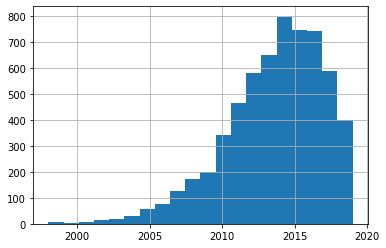

In [ ]:
#plotando o histograma de carros por ano
#vamos utilizar o histograma do pandas primeiro


df['Year'].hist(bins = 20)

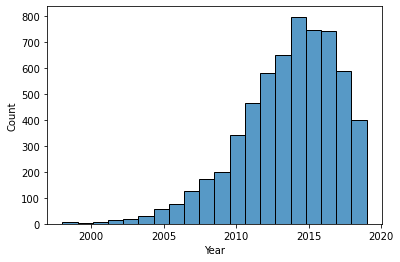

In [ ]:
# Usaremos o seaborn que é uma biblioteca própria para visualização

# Para achar um plot específico basta googlar seaborn+<nome do plot>

sns.histplot(df['Year'],bins = 20)

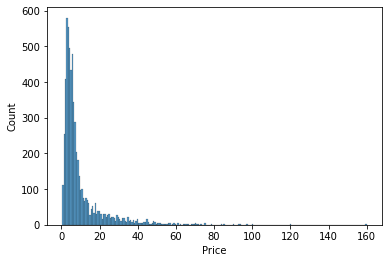

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Plote um histograma do preço                            #
#                                                            #
#                                                            # 
##############################################################

sns.histplot(df['Price']) 

##############################################################

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


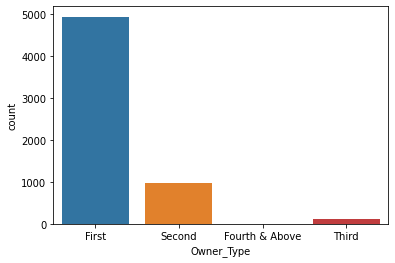

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Plote um barplot do tipo de dono                        #
#                                                            #
#  Dica: Busque por seaborn countplot                        # 
##############################################################

sns.countplot(df['Owner_Type']) 

##############################################################

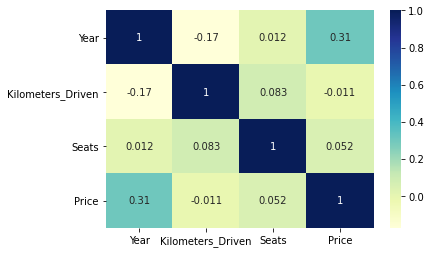

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#   Faça um plot de uma matriz de correlação pearson,       #
#   troque o esquema de cores dela e coloque números nos     #
#   quadrados                                                #
#                                                            #
#  Dica: procure seaborn heatmap e veja os argumentos        #
#  da função                                                 # 
##############################################################

pearson_matrix = df.corr()

sns.heatmap(pearson_matrix, annot=True, cmap="YlGnBu")

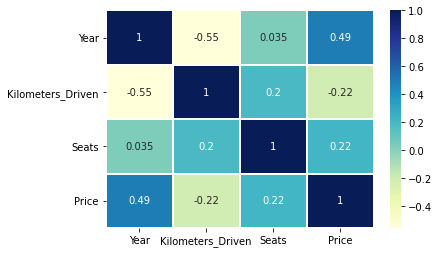

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#     Faça o mesmo plot do anterior, só que com a            #
#     correlação spearman adicione linhas entre os quadrados #
##############################################################
spearman_matrix = df.corr("spearman")

sns.heatmap(spearman_matrix, annot=True, cmap="YlGnBu", linewidths=1)

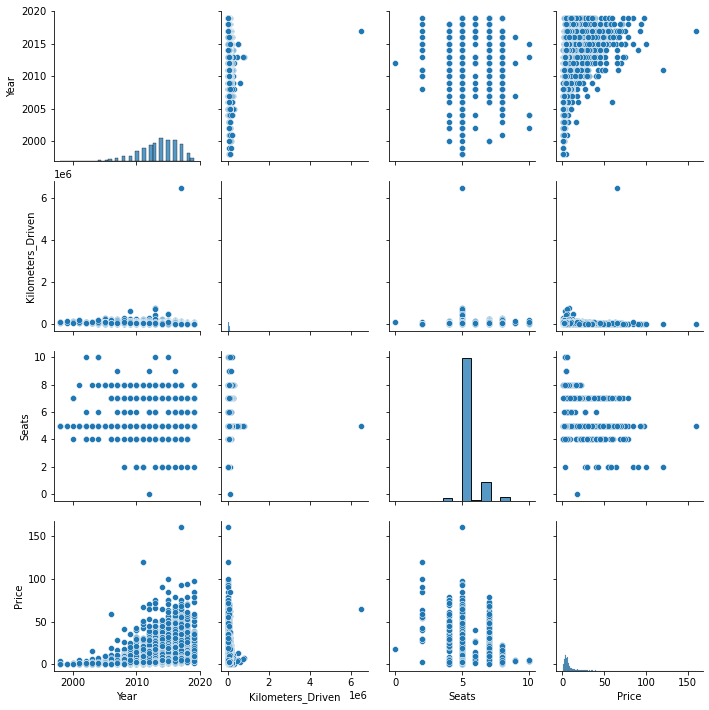

In [ ]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Plote um pairplot do Dataset. O pairplot é              # 
#    basicamente um grid de scatterplots para cada feature   #
#    numérica                                                #
#                                                            #
#  Dica: Busque por seaborn pairplot                         # 
##############################################################

sns.pairplot(df)

##############################################################